In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
from sklearn import preprocessing
from sklearn.manifold import TSNE

# Data Preprocessing

In [2]:
#load data
df = pd.read_csv("DataFiles/5.urldata.csv")

In [3]:
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [4]:
df.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [5]:
#check for null values
df.isnull().sum()

Domain           0
Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [6]:
#check for categorical variables
df.dtypes

Domain           object
Have_IP           int64
Have_At           int64
URL_Length        int64
URL_Depth         int64
Redirection       int64
https_Domain      int64
TinyURL           int64
Prefix/Suffix     int64
DNS_Record        int64
Web_Traffic       int64
Domain_Age        int64
Domain_End        int64
iFrame            int64
Mouse_Over        int64
Right_Click       int64
Web_Forwards      int64
Label             int64
dtype: object

In [7]:
#drop domain column
df = df.drop(['Domain'], axis=1)

In [8]:
#shuffle dataset
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
#split data into features and label
y = df['Label']
X = df.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [10]:
#split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((6700, 16), (3300, 16))

In [11]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [12]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
print(X_train.shape)

(6700, 16, 1)


In [13]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_test.shape)

(3300, 16, 1)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

# Building the Model

In [15]:
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(16,1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Conv1D(64, 2, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])


2022-04-07 18:03:17.382256: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [17]:
model.fit(X_train, y_train, batch_size=16,epochs=500, validation_data=(X_test, y_test), callbacks=[early_stop])
model.summary()

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
382/419 [==========================>...] - ETA: 0s - loss: 0.5653 - accuracy: 0.7273WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fb842439c20> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

# Evaluation

In [18]:
# metrics name included inside your model
model.metrics_names

['loss', 'accuracy']

In [19]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.558200,0.730746,0.470799,0.761515
1,0.455754,0.774179,0.442348,0.783939
2,0.439125,0.783881,0.443626,0.787576
3,0.441320,0.781791,0.444574,0.783030
4,0.436633,0.782537,0.429109,0.786970


<AxesSubplot:>

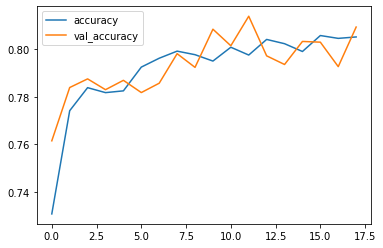

In [20]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

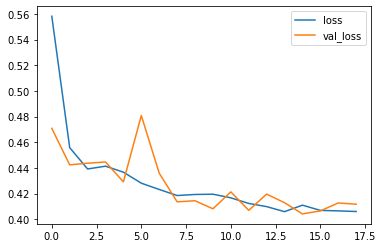

In [21]:
metrics[['loss', 'val_loss']].plot()

In [22]:
model.evaluate(X_test, y_test, verbose = 0)

[0.4116694927215576, 0.8093939423561096]

In [23]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
predictions = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [25]:
predictions = np.argmax(predictions, axis=1)

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84      1630
           1       0.97      0.64      0.77      1670

    accuracy                           0.81      3300
   macro avg       0.85      0.81      0.80      3300
weighted avg       0.85      0.81      0.80      3300



In [27]:
confusion_matrix(y_test, predictions)

array([[1595,   35],
       [ 594, 1076]])

In [28]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, predictions)*100:.2f}%")

Accuracy: 80.94%
